<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/notebooks/audio/1.0-la-audio-error-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone 'https://github.com/kevincong95/cs231n-emotiw.git'

Cloning into 'cs231n-emotiw'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 836 (delta 84), reused 76 (delta 32), pack-reused 683
Receiving objects: 100% (836/836), 185.11 MiB | 42.35 MiB/s, done.
Resolving deltas: 100% (492/492), done.


## Retrieve and Preprocess the Raw Data

In [0]:
# Switch to TF 1.x and navigate to the directory
%tensorflow_version 1.x
!pwd
import os
os.chdir('cs231n-emotiw')
!pwd

# Install required packages 
!pip install -r 'requirements-predictions.txt'

In [8]:
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt'
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/Val_labels.txt'
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/train-full.zip'
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/val-full.zip'

--2020-06-03 16:51:33--  https://storage.googleapis.com/cs231n-emotiw/data/Train_labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21653 (21K) [text/plain]
Saving to: ‘Train_labels.txt’

Train_labels.txt    100%[===================>]  21.15K  --.-KB/s    in 0s      

2020-06-03 16:51:33 (116 MB/s) - ‘Train_labels.txt’ saved [21653/21653]

--2020-06-03 16:51:33--  https://storage.googleapis.com/cs231n-emotiw/data/Val_labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6265 (6.1K) [text/plain]
Saving to: ‘Val_labels.txt’

Val_labels.txt      100%[===================>]   6.1

In [0]:
!unzip '/content/val-full.zip'


In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import os
os.chdir('/content/cs231n-emotiw')

In [0]:
from src.preprocessors.audio_preprocessor import AudioPreprocessor
audio_preprocessor_val = AudioPreprocessor(video_folder='Val/' , output_folder='val-full-4/' , label_path='./Val_labels.txt')

Using TensorFlow backend.


Video Preprocessor created with video_folder = Val/ , output_folder = val-full-4/, output_file = None
Frames will be created with hop_size = 0.5


In [0]:
audio_preprocessor_val.preprocess(batch_size=32)

## Retrieve Preprocessed Data

In [0]:
!cp '/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/val-final-audio.zip' '/content/'

In [3]:
!unzip val-final-audio.zip

Archive:  val-final-audio.zip
   creating: val-final-audio/audio-pickle/
 extracting: val-final-audio/audio-pickle/27_20.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/53_30.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/157_10.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/298_2.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/333_1.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/44_2.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/86_47.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/325_49.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/99_6.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/212_6.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/335_2.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/325_7.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/53_36.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/125_6.mp4-openl3.pkl  
 extracting: val-

In [0]:
%tensorflow_version 2.x

In [0]:
!wget 'https://storage.googleapis.com/cs231n-emotiw/data/val-final-audio.zip'

In [31]:
!unzip val-final-audio.zip

Archive:  val-final-audio.zip
replace val-final-audio/audio-pickle/27_20.mp4-openl3.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: val-final-audio/audio-pickle/27_20.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/53_30.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/157_10.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/298_2.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/333_1.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/44_2.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/86_47.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/325_49.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/99_6.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/212_6.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/335_2.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/325_7.mp4-openl3.pkl  
 extracting: val-final-audio/audio-pickle/53_36.mp4-openl3.pkl  
 extracting: val-final-aud

In [0]:
import numpy as np
import glob
#X_train = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-X-openl3-train.pkl', allow_pickle=True)
#Y_train = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-final/audio-pickle-all-Y-openl3-train.pkl' , allow_pickle=True)

X_val = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/audio-pickle-all-X-openl3.pkl' , allow_pickle=True)
Y_val = np.load('/content/drive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/audio-pickle-all-Y-openl3.pkl' , allow_pickle=True)

s = np.arange(X_val.shape[0])
np.random.shuffle(s)
X_val = X_val[s]
Y_val = Y_val[s]

video_path = '/content/Val/'
videos = glob.glob(video_path + '/*.mp4')
videos = np.asarray(videos)
videos = videos[s]

## Retrieve Model and Predict/Evaluate

In [0]:
import tensorflow as tf

In [61]:
!wget 'https://storage.googleapis.com/cs231n-emotiw/models/openl3-cnn-lstm-tuned-lr.h5'

--2020-06-03 17:13:39--  https://storage.googleapis.com/cs231n-emotiw/models/openl3-cnn-lstm-tuned-lr.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17223968 (16M) [application/octet-stream]
Saving to: ‘openl3-cnn-lstm-tuned-lr.h5.1’

openl3-cnn-lstm-tun 100%[===================>]  16.43M  21.9MB/s    in 0.8s    

2020-06-03 17:13:40 (21.9 MB/s) - ‘openl3-cnn-lstm-tuned-lr.h5.1’ saved [17223968/17223968]



In [62]:
model = tf.keras.models.load_model('openl3-cnn-lstm-tuned-lr.h5')

In [63]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 6144)]      0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          786496    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 64)          256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 512)         66048     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 512)         2048  

In [64]:
print(X_val.shape)

(766, 11, 6144)


## Evaluate Model Performance

In [0]:
predictions = model.predict(X_val)

In [66]:
model.evaluate(X_val , Y_val)

24/24 [==============================] - 0s 7ms/step - loss: 1.0272 - accuracy: 0.5770


[1.0272266864776611, 0.5770235061645508]

#### F1 Score


In [67]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_val)
Y_class = y_pred.argmax(axis=-1)
f1_score(Y_val, Y_class, average='micro')

0.577023498694517

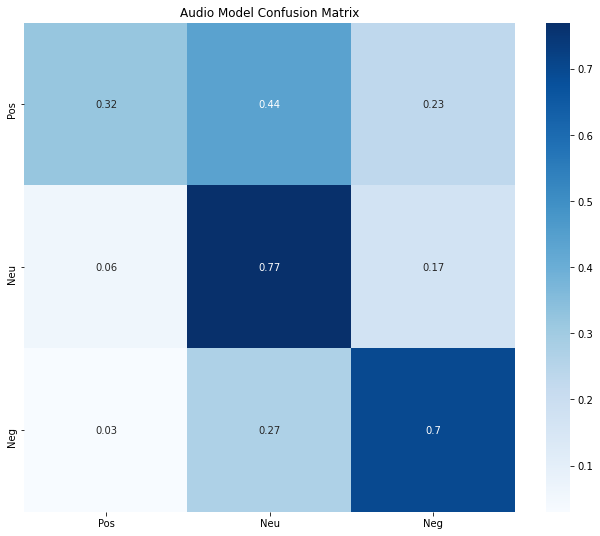

In [68]:
from sklearn import metrics 
import pandas as pd
import seaborn as sn

import matplotlib.pyplot as plt


classes=['Pos' , 'Neu' , 'Neg'] 

con_mat = tf.math.confusion_matrix(labels=Y_val, predictions=Y_class).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                  index = classes, 
                  columns = classes)


figure = plt.figure(figsize=(11, 9))
plt.title("Audio Model Confusion Matrix")
sn.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)

In [69]:
from sklearn.metrics import classification_report
target_names = ["Positive" , "Neutral" , "Negative"]
print(classification_report(Y_val, Y_class, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.82      0.32      0.46       302
     Neutral       0.54      0.77      0.63       280
    Negative       0.52      0.70      0.60       184

    accuracy                           0.58       766
   macro avg       0.63      0.60      0.57       766
weighted avg       0.64      0.58      0.56       766



## Visualize some of the Embeddings on a per frame basis

In [0]:
import matplotlib.pyplot as plt
import cv2

class_names = ["Positive" , "Neutral" , "Negative"]
def plot_embeddings(i, time_point, predictions_array, true_label, embeddings):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])


  embed_sqr = np.concatenate([embeddings[i][time_point]]*embeddings.shape[2])
  embed_sqr = cv2.resize(embed_sqr, (28, 28))

  plt.imshow(embed_sqr, cmap=plt.cm.binary)



  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

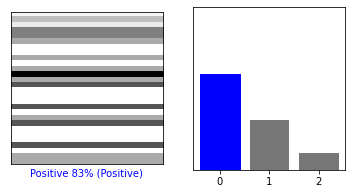

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_embeddings(i , 1 , predictions, Y_val , X_val)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_val)
plt.show()

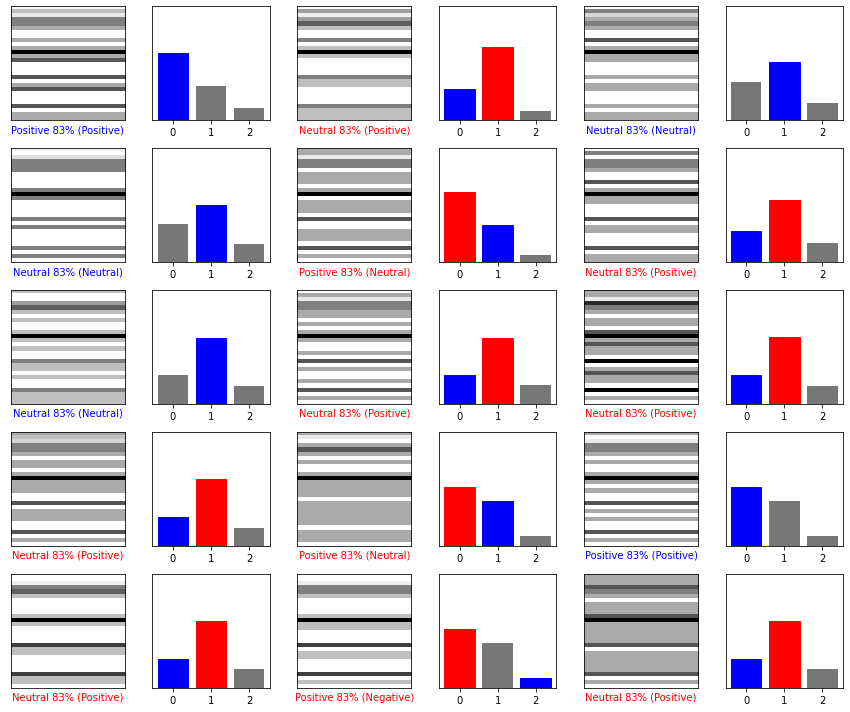

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3


num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_embeddings(i , 1 , predictions, Y_val , X_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  Y_val)
plt.tight_layout()
plt.show()

## Visualize the input spectrograms and how they affect predictions



[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/100_1.mp4 -ab 3000k -ar 44100 /content/Val//tmp/100_1.extracted_audio.wav
... command successful.


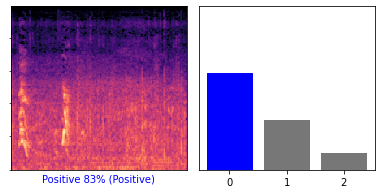

In [56]:
# TO DO
import librosa
import librosa.display
from librosa.feature import melspectrogram
import sys
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio
import os

!mkdir '/content/Val/tmp'

files = sorted(glob.glob('/content/cs231n-emotiw/Val/*.mp4'))

def plot_spectrogram(i, video_path, video_name , predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  output_wav_file = video_name[:-3] + 'extracted_audio.wav'
  ffmpeg_extract_audio(video_path + video_name, video_path + "/tmp/" + output_wav_file)
  y, sr = librosa.load(video_path + "/tmp/" + output_wav_file)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                      fmax=8000)
  S_dB = librosa.power_to_db(S, ref=np.max)

  librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr,
                            fmax=8000)

  #plt.colorbar(format='%+2.0f dB')
  #plt.title('Mel-frequency spectrogram')
  plt.tight_layout()
  plt.yticks([])
  plt.xticks([])
  plt.ylabel("")



  predicted_label = np.argmax(predictions_array[i])


  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

video_name = '/content/Val/100_1.mp4'
video_path = '/content/Val/'
video_name = os.path.basename(video_name)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_spectrogram(0 , video_path , video_name , predictions, Y_val)
plt.subplot(1,2,2)
plot_value_array(0, predictions[0],  Y_val)
plt.show()


[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/294_37.mp4 -ab 3000k -ar 44100 /content/Val//tmp/294_37.extracted_audio.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/289_68.mp4 -ab 3000k -ar 44100 /content/Val//tmp/289_68.extracted_audio.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/55_10.mp4 -ab 3000k -ar 44100 /content/Val//tmp/55_10.extracted_audio.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/86_6.mp4 -ab 3000k -ar 44100 /content/Val//tmp/86_6.extracted_audio.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/325_29.mp4 -ab 3000k -ar 44100 /content/Val//tmp/325_29.extracted_audio.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/Val/81_1.mp4 -ab 3000k -ar 44100 /content/Val//tmp/81_1.extracted_audio.wav
... command successful.

[MoviePy] Running:
>>> /usr/bin/ffmpeg -y -i /content/V

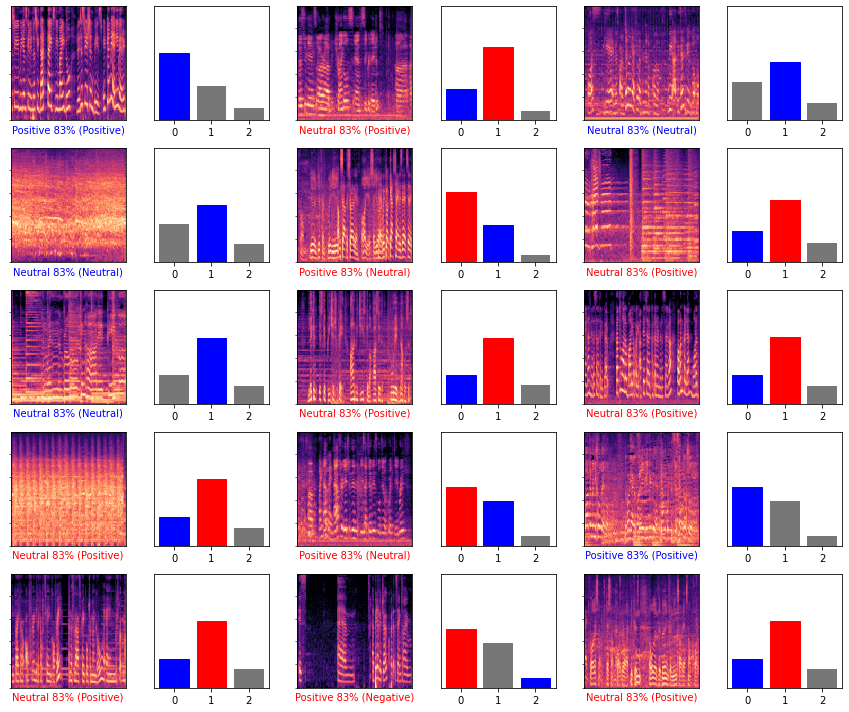

In [57]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
import glob
num_rows = 5
num_cols = 3


num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  video_name = os.path.basename(videos[i])
  plot_spectrogram(i , video_path , video_name , predictions, Y_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  Y_val)
plt.tight_layout()
plt.show()